In [1]:
import os
import numpy as np

import yaml
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import seaborn as sns

from OrderParameter import *

# Download link
def download_link(doi, file):
    if "zenodo" in doi.lower():
        zenodo_entry_number = doi.split(".")[2]
        return 'https://zenodo.org/record/' + zenodo_entry_number + '/files/' + file
    else:
        print ("DOI provided: {0}".format(doi))
        print ("Repository not validated. Please upload the data for example to zenodo.org")
        return ""
    
# read mapping file
def read_mapping_file(mapping_file, atom1):
    with open(mapping_file, 'rt') as mapping_file:
            for line in mapping_file:
                if atom1 in line:
                    m_atom1 = line.split()[1]
    return m_atom1

def read_mapping_filePAIR(mapping_file, atom1, atom2):
    with open(mapping_file, 'rt') as mapping_file:
            print(mapping_file)
            for line in mapping_file:
                if atom1 in line:
                    m_atom1 = line.split()[1]
#                    print(m_atom1)
                if atom2 in line: 
                    m_atom2 = line.split()[1]
#                    print(m_atom2)
    return m_atom1, m_atom2

def make_positive_angles(x):
    for i in range(len(x)):
        if x[i] < 0:
            x[i] = np.degrees(x[i]) + 360
        else:
            x[i] = np.degrees(x[i])
    return x

In [2]:
## Plot area per lipid from different POPC:POPG mixtures

In [4]:
colors = {'POPC' :'black','POPS':'red','POPE':'blue','POPG':'green'}
markers = {'POPC' :'s','POPS':'o','POPE':'o','POPG':'s'}
lipids = ['POPC','POPG']
#DOIs = {'POPC' :'10.5281/zenodo.3474862','POPG' :'10.5281/zenodo.1011096','POPS' :'10.5281/zenodo.1129415','POPE' :'10.5281/zenodo.2641987'}

apl = {}
resultsPOPG = {}

#fig= plt.figure(figsize=(10,7))
for subdir, dirs, files in os.walk(r'../Data/APL/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith("README.yaml"):
            READMEfilepath = subdir + '/README.yaml'
            with open(READMEfilepath) as yaml_file:
                readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                Nlipids = [readme.get('N' + lipids[0])[0],readme.get('N' + lipids[1])[0]]
                #print(Nlipids)
                if Nlipids[0] > 0 or Nlipids[1] > 0:
                    #print(subdir)
                    try:
                        CaConcentration = readme.get('NCAL') * 55.5 / readme.get('NSOL')
                    except:
                        print('Somenthing wrong with molecule numbers in' + subdir)
                    lipidsRATIO = 100* Nlipids[1] / (Nlipids[0] + Nlipids[1])
                    forcefield = readme.get('FF')
                    temperature = readme.get('TEMPERATURE')
                    DOI = readme.get('DOI')
                    APLfilepath = subdir + '/apl.dat'
                    #OPfilepathPOPG = subdir + '/POPGOrderParameters.json'
                    try :
                        with open(APLfilepath) as apl_file:
                            for line in apl_file:
                                apl[lipidsRATIO,CaConcentration,forcefield,temperature,DOI] = line
                                #apl = line 
                                #json.load(json_file)
                                #results[lipidsRATIO,CaConcentration,forcefield] = data
                    except :
                        print('apl file not found')
                    
for key in apl:
    outfile=open('../Data/' + str(key[2]) + "_T" + str(key[3]) + "_CaCl" + str(round(key[1],3)) + 'PCPG_APL.dat','w')
    #outfile.write('#Lipid ratio        APL \n')
    outfile.close()
                    
for key in apl:
    outfile=open('../Data/' + str(key[2]) + "_T" + str(key[3]) + "_CaCl" + str(round(key[1],3)) + 'PCPG_APL.dat','a')
    #Lipid2cont = int(round(key[0]))
    #CaConsentration = key[1]
    outfile.write(str(round(key[0],3)) + " " + str(apl[key]) + " " + str(key[4]))
    outfile.write('\n')
    outfile.close()
    !sort -n -k 1 {'../Data/' + str(key[2]) + "_T" + str(key[3]) + "_CaCl" + str(round(key[1],3)) + 'PCPG_APL.dat'} -o {'../Data/' + str(key[2]) + "_T" + str(key[3]) + "_CaCl" + str(round(key[1],3)) + 'PCPG_APL.dat'}
#plt.legend(loc='best',ncol=2, fontsize=15)
#plt.ylabel('S_CH', fontsize=20)
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
##plt.savefig('../Figs/CHARMMfromLIPIDS.eps', bbox_inches='tight')

Somenthing wrong with molecule numbers in../Data/APL/edf/8a8/edf8a82ed02a87f84c14b740c90dfa718d3f7f8b/1048c4444299bb5adb360e7e17df2b616ab7a4fc
Somenthing wrong with molecule numbers in../Data/APL/299/9ba/2999ba7a8e75cdcbd0493b035d620556aa9a57c5/a92f8b57bb117b56d3bb16edc0d69662e0517d31
Somenthing wrong with molecule numbers in../Data/APL/c3d/47f/c3d47f84c24d1aef48e212cb258e6e54d63404b8/79855c9911fcce258ddc511b9c476b7bfe4c2182
Somenthing wrong with molecule numbers in../Data/APL/6e8/031/6e803117ac69d06705e1f024f63ae7e324a0677b/788e5d78db0bd8aafdf3f1d1c0acc33cd7ad0a71
Somenthing wrong with molecule numbers in../Data/APL/63a/479/63a47940524010d5a2ff46f0d4c89b4b69e0ad4f/9d9ca60b644e801ec759177e4b1cbe5bf413fe25
Somenthing wrong with molecule numbers in../Data/APL/e24/62a/e2462abc0128804263156d1f68638eb22de0ada6/fd4e6f8ed63c831f7b8bef6c2e22a887e49f73f9
Somenthing wrong with molecule numbers in../Data/APL/16a/a70/16aa70c118dbfdbb7bd8e0462575e2776e0dec9a/ba8633f6385dbf4c344b8a7580603620b0d52603

# Plot APLs

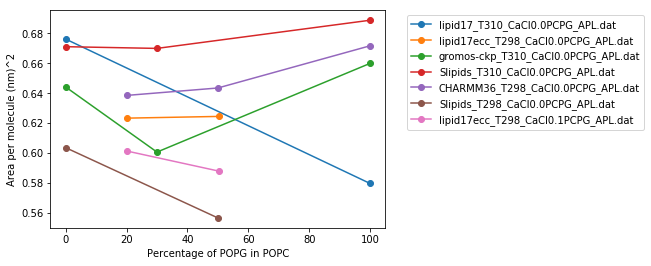

In [36]:
#fig= plt.figure(figsize=(10,7))
for subdir, dirs, files in os.walk(r'../Data/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith("APL.dat"):
            with open(filepath) as APLfile:
                lines = APLfile.readlines()#[1:]
                x = [float(line.split()[0]) for line in lines]
                y = [float(line.split()[1]) for line in lines]
                #print(filepath,x,y)
                if len(x) > 1:
                    plt.plot(x,y,label = filename,marker='o')
plt.legend(bbox_to_anchor=(1.05, 1),loc='best')
plt.xlabel('Percentage of POPG in POPC')
plt.ylabel('Area per molecule (nm)^2')
plt.savefig('../Figs/aplTST.png', bbox_inches='tight')